# Using the techindicators.py functions

This example notebook shows how to import the functions from techindicators.py, carry out calculations with them, and plot the resulting data.  To use this notebook, place this notebook file, example_data.csv file, and technindicators.py file all in the same directory.  Then open the notebook file using the Jupyter client in order to execute and modify the code in the cells below.  This notebook requires that Numpy, Matplotlib, and Datetime modules be installed.

In [1]:
%matplotlib inline
import numpy as np 
from techindicators import * # This line imports all functions from techindicators.py
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_finance import candlestick2_ohlc

## Importing data

The example_data.csv file contains daily trading data for the SPY exchange traded fund.  The 6 columns of data contain the date, open price, high price, low price, closing price, and trading volume, in that order.  Numpy is used to import the data from the csv file.  Individual columns of price and volume data are stored as Numpy arrays containing the numbers as floats.  The date data are stored as a Numpy array in datetime64 format. 

In [3]:
ticker='SPY'
stockdata = np.genfromtxt('example_data.csv', delimiter=',')
sd_open = stockdata[:,1] # Open
sd_high = stockdata[:,2] # High
sd_low = stockdata[:,3] # Low
sd_close = stockdata[:,4] # Close
sd_volume = stockdata[:,5] # Volume
sd_dates = np.loadtxt('example_data.csv', delimiter=',', usecols=(0), dtype='datetime64[D]') # Dates
tradedays = np.arange(len(sd_close)) # Array of number of trading days

## Calculating moving averages

The 50 day simple moving average, 20 day exponential moving average, and 10,2,30 day Kaufman adpative moving average are calculated below.

In [4]:
sma50 = sma(sd_close,50) # calculate 50 day SMA of closing price
ema20 = ema(sd_close,20) # calculate 20 day EMA of closing price
kama_sd = kama(sd_close,10,2,30) # calculate standard Kaufman adaptive moving average

## Plotting prices and moving averages

The array length of the moving averages depends upon the number of periods used for averaging.  As a result, the x-axis data (in this case the dates) must be truncated to match the y-axis data for each moving average.  Below, Numpy array slicing is used to truncate the date data and the dates are also converted to the datetime data format for matplotlib.  Note that the moving averages do not appear smooth.  This is an artifact of matplotlib placing gaps in the data on dates where there is no trading (weekends and holidays).

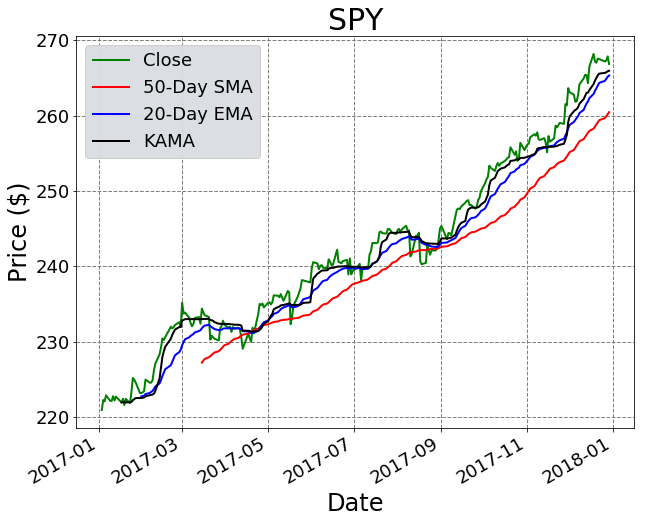

In [5]:
# plot daily closing price of SPY along with 50-day SMA, 20-day EMA, and KAMA
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(sd_dates.astype(datetime),sd_close,color='green',lw=2,label="Close")
ax.plot(sd_dates[len(sd_dates)-len(sma50):].astype(datetime),sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(sd_dates[len(sd_dates)-len(ema20):].astype(datetime),ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(sd_dates[len(sd_dates)-len(kama_sd):].astype(datetime),kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Date',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
fig.autofmt_xdate()
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

Rather than placing dates on the x-axis, it is possible to create an array containing the trading days of the year numbered in order.  This eliminates the artifacts introduced by matplotlib's handling of weekends and trading holidays.

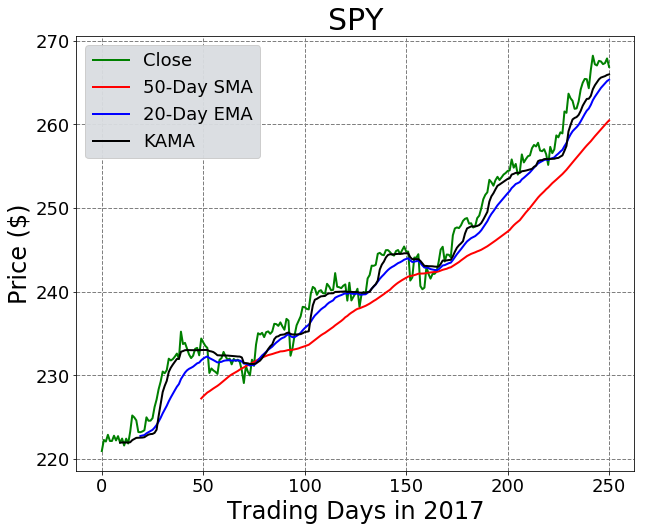

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(tradedays,sd_close,color='green',lw=2,label="Close")
ax.plot(tradedays[len(sd_dates)-len(sma50):],sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(tradedays[len(sd_dates)-len(ema20):],ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(tradedays[len(sd_dates)-len(kama_sd):],kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Calculating and displaying the latest values of technical indicators

Below, the 20-day commodity channel index, 14-day average true range, and 14-day relative strength index are calculated.  The values of these indicators are then printed out for the last trading day of the year.

In [7]:
cci20 = cci(sd_high,sd_low,sd_close,20) # 20-day commodity channel index
atr14 = atr(sd_high,sd_low,sd_close,14) # 14-day average true range
rsi14 = rsi(sd_close,14) # 14-day relative strength index
rstd10 = rstd(sd_close,10) # 10-day rolling standard deviation
print('Technical indicator values for {} on {}:'.format(ticker,sd_dates[-1]))
print('')
print('The 20-day CCI was {:.2f}.'.format(cci20[-1]))
print('The 14-day ATR was {:.2f}.'.format(atr14[-1]))
print('The 14-day RSI was {:.2f}.'.format(rsi14[-1]))
print('The 10-day rolling standard deviation was {:.2f}.'.format(rstd10[-1]))

Technical indicator values for SPY on 2017-12-29:

The 20-day CCI was 63.75.
The 14-day ATR was 1.43.
The 14-day RSI was 63.92.
The 10-day rolling standard deviation was 0.47.


## Plotting the Accumulation/Distribution Line

For the Accumulation/Distribution line, the absolute values of ADL do not matter as much as the trend.  To just show the trend, the ADL is plotted without y-axis ticks and labels.

In [8]:
adl_sd = adl(sd_high,sd_low,sd_close,sd_volume) # Accumulation/Distribution line

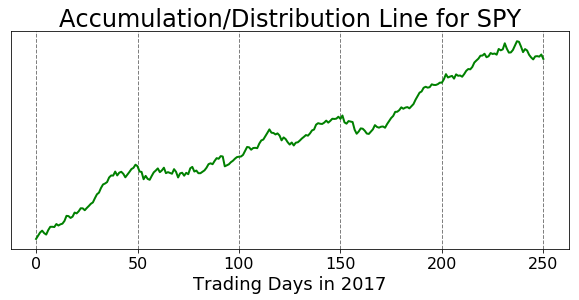

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays,adl_sd,color='green',lw=2)
ax.set_title('Accumulation/Distribution Line for %s' % ticker,fontsize=24)
ax.set_yticks([])
ax.set_xlabel('Trading Days in 2017',fontsize=18)
ax.set_ylabel('',fontsize=18)
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

## MACD Calculations and Plotting

The code below calculates the Moving Average Convergence/Divergence using the standard number of periods for averaging of 12, 26, and 9 for the fast EMA, slow EMA, and Signal Line, respectively.  The MACD Line and Signal Line are then plotted.

In [10]:
macd_line_sd = macd(sd_close,12,26,9)[0]
macd_signal_sd = macd(sd_close,12,26,9)[1]
macd_histogram_sd = macd_line_sd[len(macd_line_sd)-len(macd_signal_sd):]-macd_signal_sd

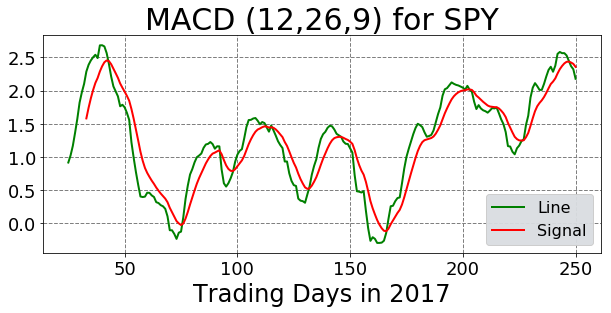

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(macd_line_sd):],macd_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(macd_signal_sd):],macd_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('MACD (12,26,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

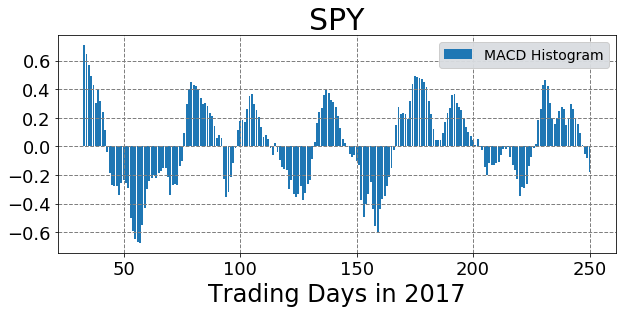

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tradedays[len(tradedays)-len(macd_histogram_sd):],macd_histogram_sd,label="MACD Histogram")
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## PPO Calculations and Plotting

The percent price oscillator is an analog of the MACD.  The difference is that the MACD is an absolute difference between two moving averages, while for the PPO it is a difference relative to the value of the slower moving average. By focusing on percent differences relative to the slower moving average, the values of the PPO line do not depend on the price, but on changes in price. Therefore the PPO can be used over long time frames in which the price may have changed significantly, or to compare different equities that have very different prices.  The calculation and plotting of PPO is the same as with the MACD.

In [13]:
ppo_line_sd = ppo(sd_close,12,26,9)[0]
ppo_signal_sd = ppo(sd_close,12,26,9)[1]
ppo_histogram_sd = ppo_line_sd[len(ppo_line_sd)-len(ppo_signal_sd):]-ppo_signal_sd

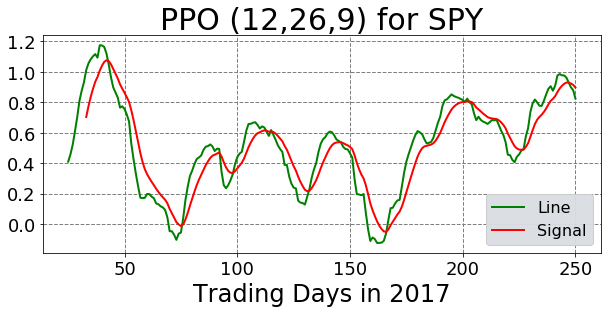

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(ppo_line_sd):],ppo_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(ppo_signal_sd):],ppo_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('PPO (12,26,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

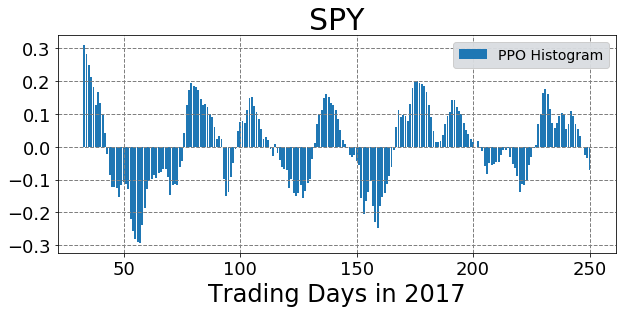

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tradedays[len(tradedays)-len(ppo_histogram_sd):],ppo_histogram_sd,label="PPO Histogram")
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=14, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## TRIX Calculations and Plotting

The TRIX indicator line is a percentage change in a triple EMA smoothed price series.  The signal is an EMA of the TRIX line.  The trix function requires a price series, a number of periods for each EMA used in calculating the line, and a number of periods used in the calculation of the signal.  The standard parameters are 15 periods for the line calculation, and 9 periods for the signal.  The TRIX(15,9) indicators is very similar to MACD(12,26,9)

In [16]:
trix_line_sd = trix(sd_close,15,9)[0]
trix_signal_sd = trix(sd_close,15,9)[1]

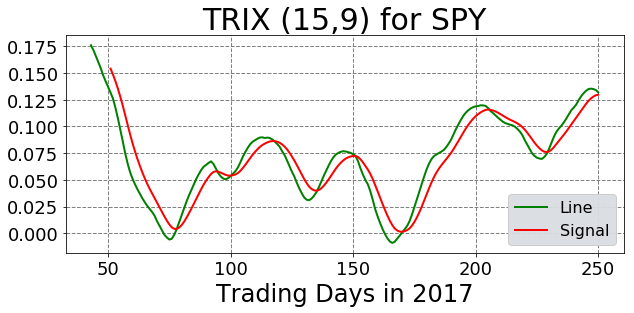

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(trix_line_sd):],trix_line_sd,color='green',lw=2,label="Line")
ax.plot(tradedays[len(tradedays)-len(trix_signal_sd):],trix_signal_sd,color='red',lw=2,label="Signal")
ax.set_title('TRIX (15,9) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Calculating and Plotting Keltner Channels

The Keltner channels consist of a center line that is an exponential moving average (typically of the closing price), and upper and lower lines that are formed by adding and subtracting, respectively, a multiple of the average true range.  There are three adjustable parameters: the number of periods used to calculate the center line EMA, the multiple used for the ATR, and the number of periods used to calculate the ATR.  The standard Keltner channel uses the parameters, 20 for the periods used in calculating the EMA, 2 as the multiple of ATR, and 10 as the number of periods used in calculating ATR.  Keltner channels are best visualized on a candlestick chart, as shown below.

In [18]:
kelt_sd = kelt(sd_high,sd_low,sd_close,20,2.0,10) # Kelter Channel calculated with standard parameters
lowl = kelt_sd[0] # lower line
cenl = kelt_sd[1] # center line
uppl = kelt_sd[2] # upper line

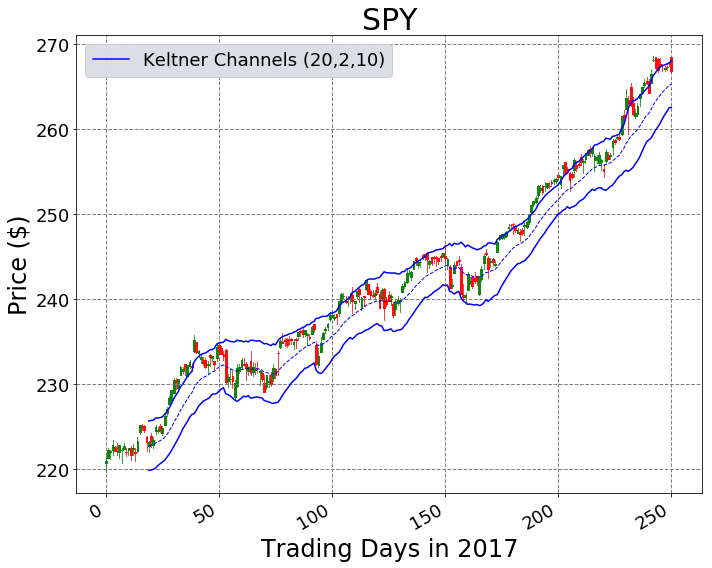

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(lowl):],lowl,color='blue',lw=1.5,label='Keltner Channels (20,2,10)')
ax.plot(tradedays[len(sd_dates)-len(uppl):],uppl,color='blue',lw=1.5,label='')
ax.plot(tradedays[len(sd_dates)-len(cenl):],cenl,color='blue',lw=1.0,linestyle='--',label='')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Calculating and Plotting Bollinger Bands<html>&reg;</html>

The Bollinger Bands<html>&reg;</html> consist of a center line that is an simple moving average (typically of the closing price), and upper and lower lines that are formed by adding and subtracting, respectively, a multiple of the rolling standard deviation.  There are three adjustable parameters: the number of periods used to calculate the center line SMA, the multiple used for the standard deviation, and the number of periods used to calculate the standard deviation.  The standard Bollinger Bands<html>&reg;</html> uses the parameters: 20 for the periods used in calculating the EMA, 2 as the multiple of standard deviation, and 20 as the number of periods used in calculating standard deviation.  Bollinger Bands<html>&reg;</html> are best visualized on a candlestick chart, as shown below.

In [20]:
boll_sd = boll(sd_close,20,2.0,20) # Bollinger Bands calculated with standard parameters
lowlb = boll_sd[0] # lower line
cenlb = boll_sd[1] # center line
upplb = boll_sd[2] # upper line

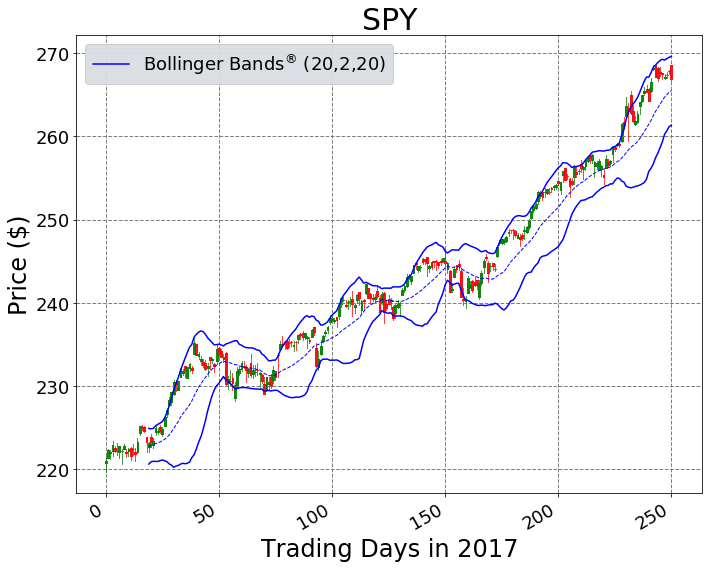

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
candlestick2_ohlc(ax,sd_open,sd_high,sd_low,sd_close,width=0.8,colorup='g',colordown='r',alpha=0.75)
ax.plot(tradedays[len(sd_dates)-len(lowlb):],lowlb,color='blue',lw=1.5,label='Bollinger Bands$^\circledR$ (20,2,20)')
ax.plot(tradedays[len(sd_dates)-len(upplb):],upplb,color='blue',lw=1.5,label='')
ax.plot(tradedays[len(sd_dates)-len(cenlb):],cenlb,color='blue',lw=1.0,linestyle='--',label='')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Stochastic Oscillator

The stochastic oscillator function require 6 parameters: high, low, and close prices, a look back period, a number of periods for the %K simple moving average, and a number of periods for the %D simple moving average.  The standard look back period is 14.  Shown below is the calculation and plotting of the stochastic oscillator with a 14 period look back, 3 period SMA for %K, and 3 period SMA for %D.  These parameters (14,3,3) calculate the standard slow stochastic oscillator.  Using parameters of 14,1,3 would calculate the standard fast stochastic oscillator.  The stoch function can be adjusted to other look back and moving average periods.

In [22]:
stoch_sd = stoch(sd_high,sd_low,sd_close,14,3,3) # Full stochastics calculated with standard parameters
stoch_k = stoch_sd[0] # %K parameter
stoch_d = stoch_sd[1] # %D parameter

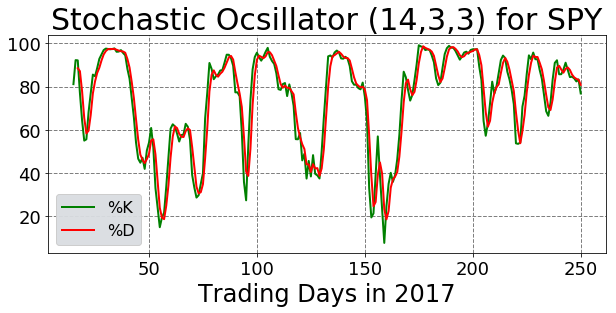

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(tradedays[len(tradedays)-len(stoch_k):],stoch_k,color='green',lw=2,label="%K")
ax.plot(tradedays[len(tradedays)-len(stoch_d):],stoch_d,color='red',lw=2,label="%D")
ax.set_title('Stochastic Ocsillator (14,3,3) for %s' % ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=16, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()